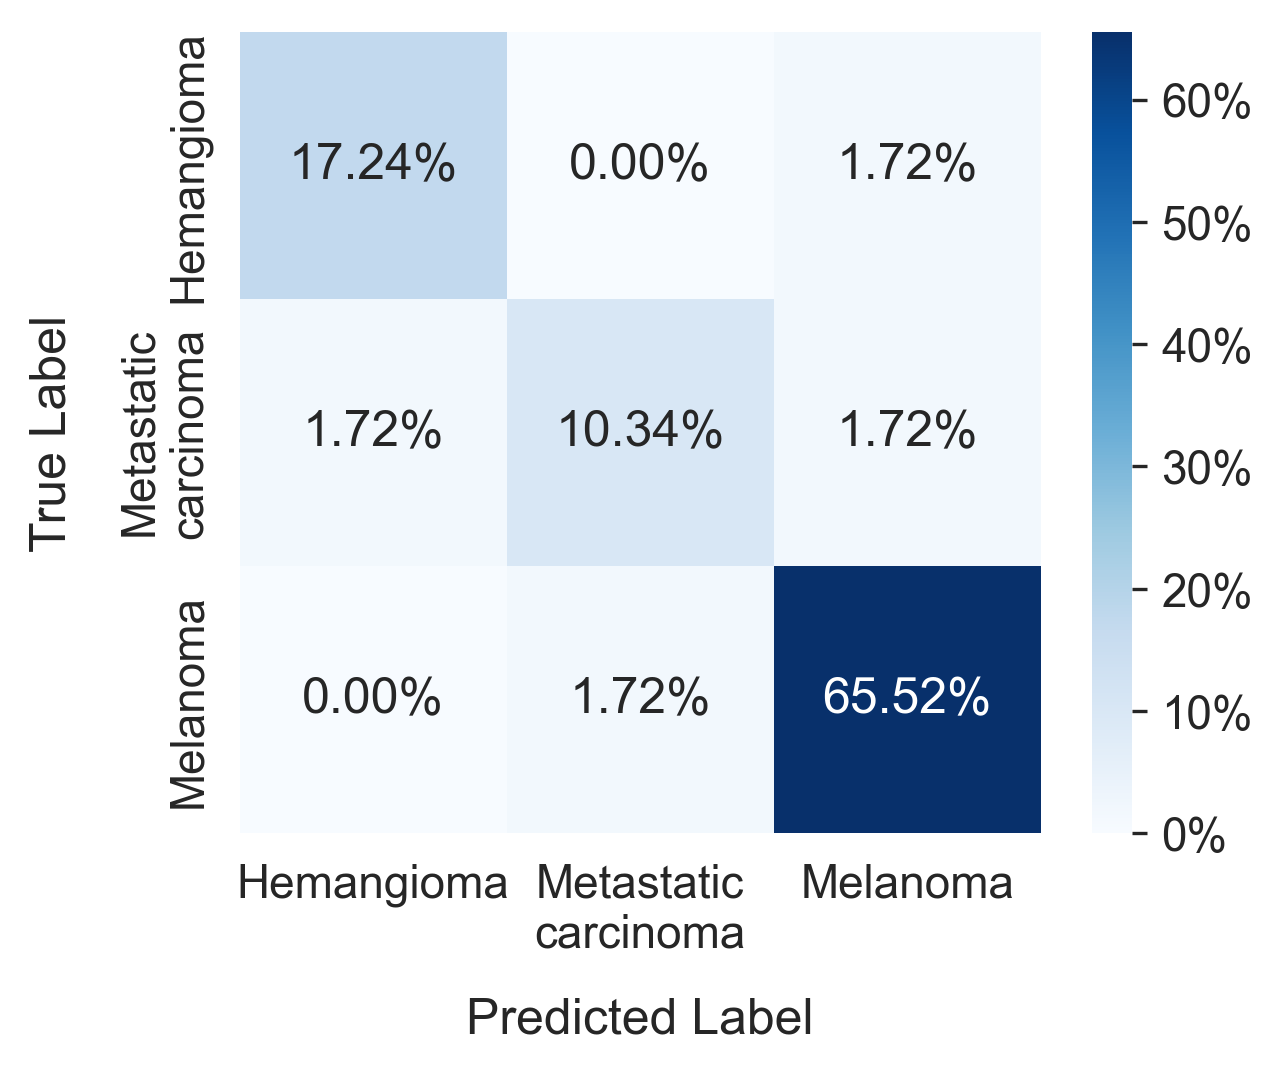

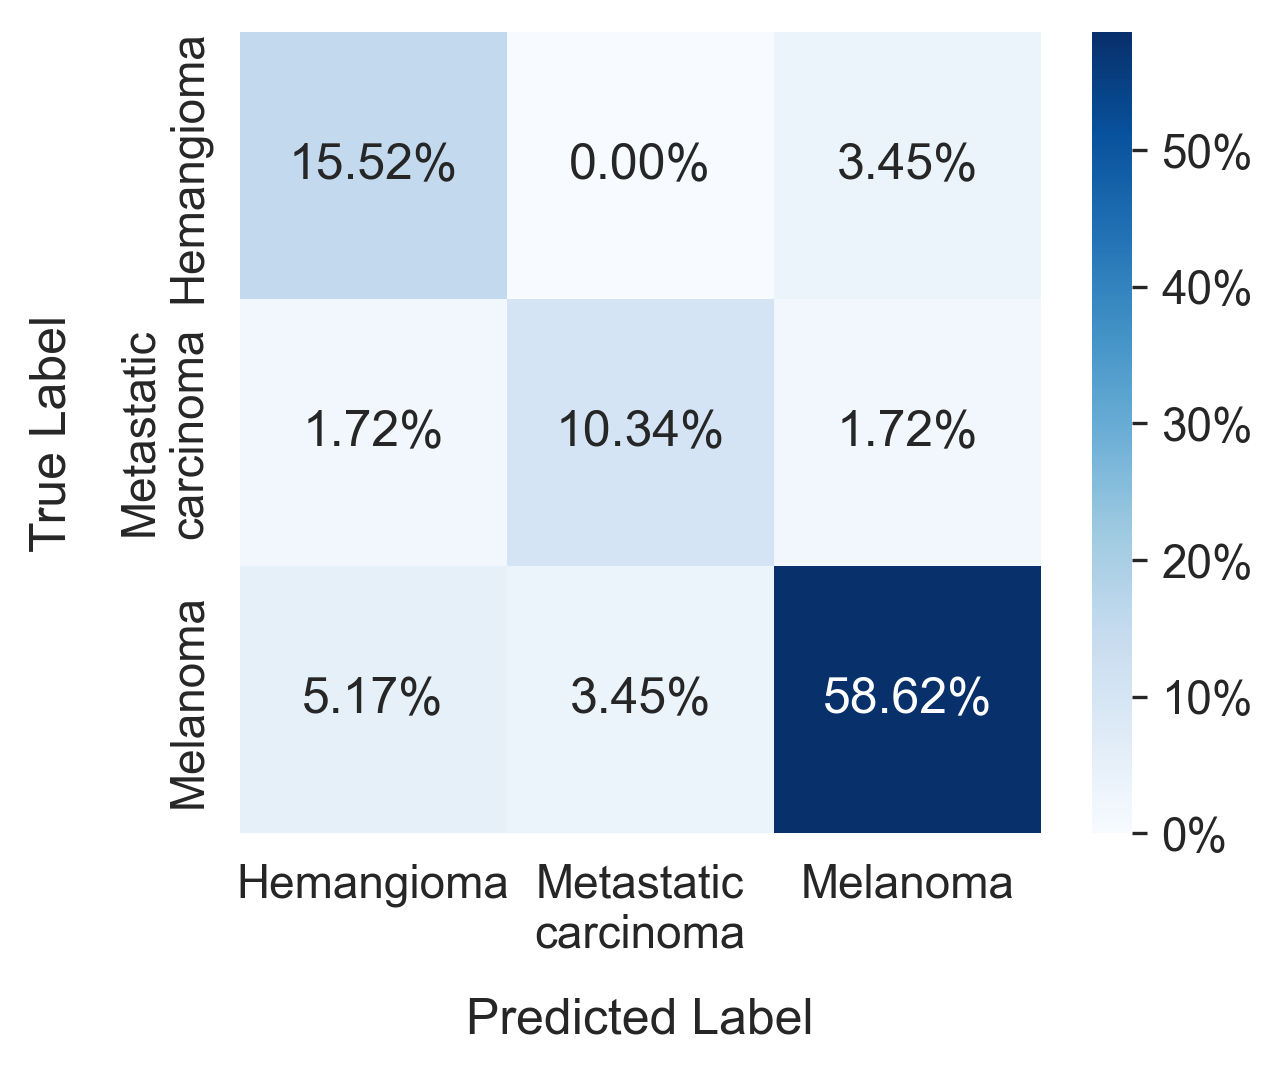

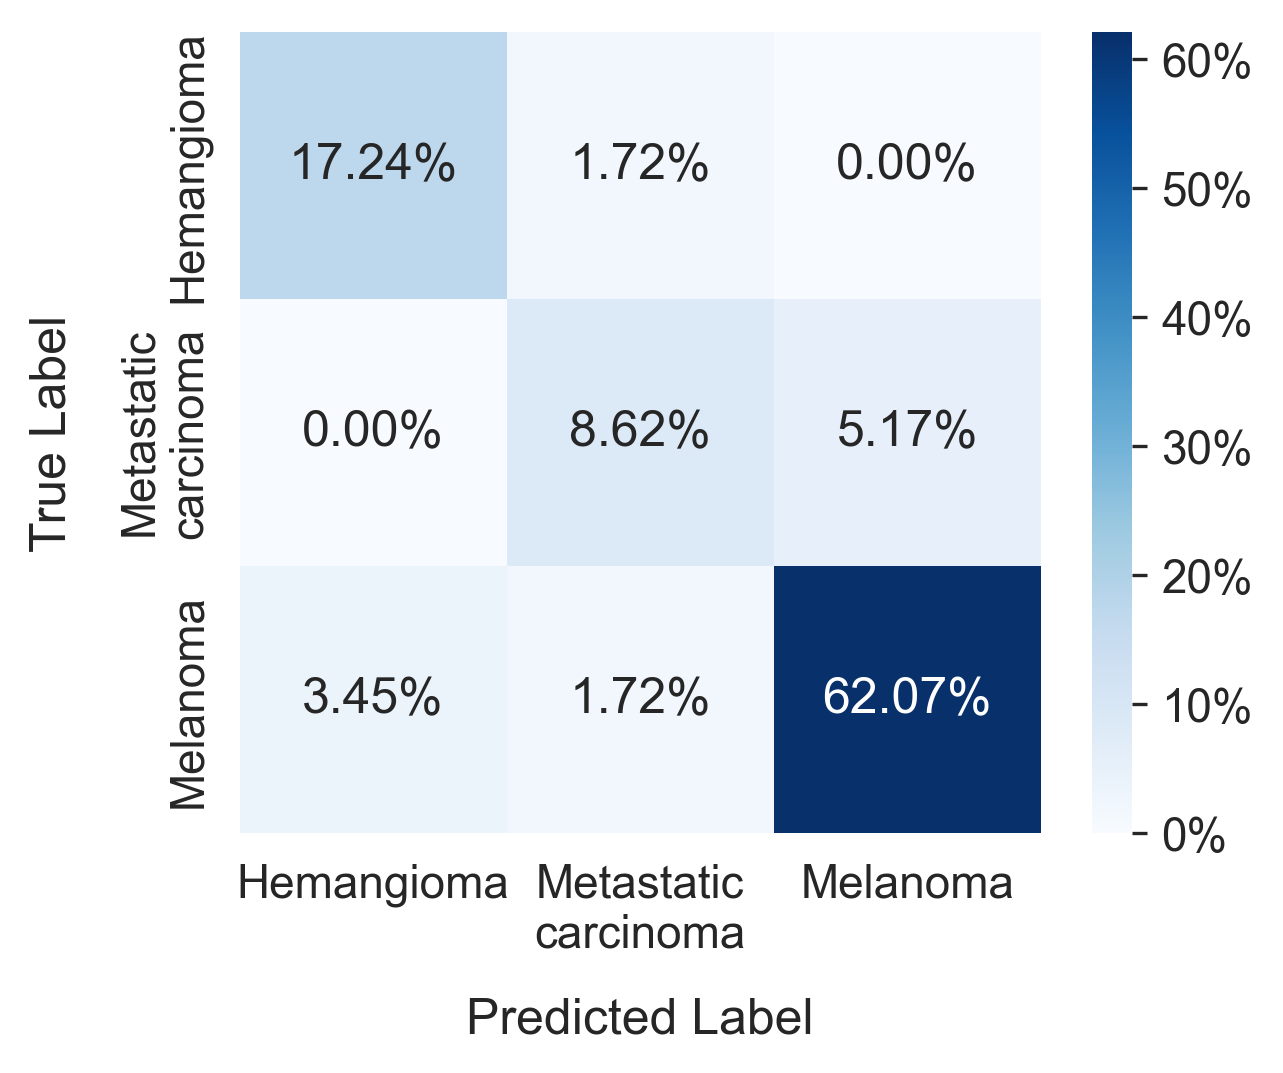

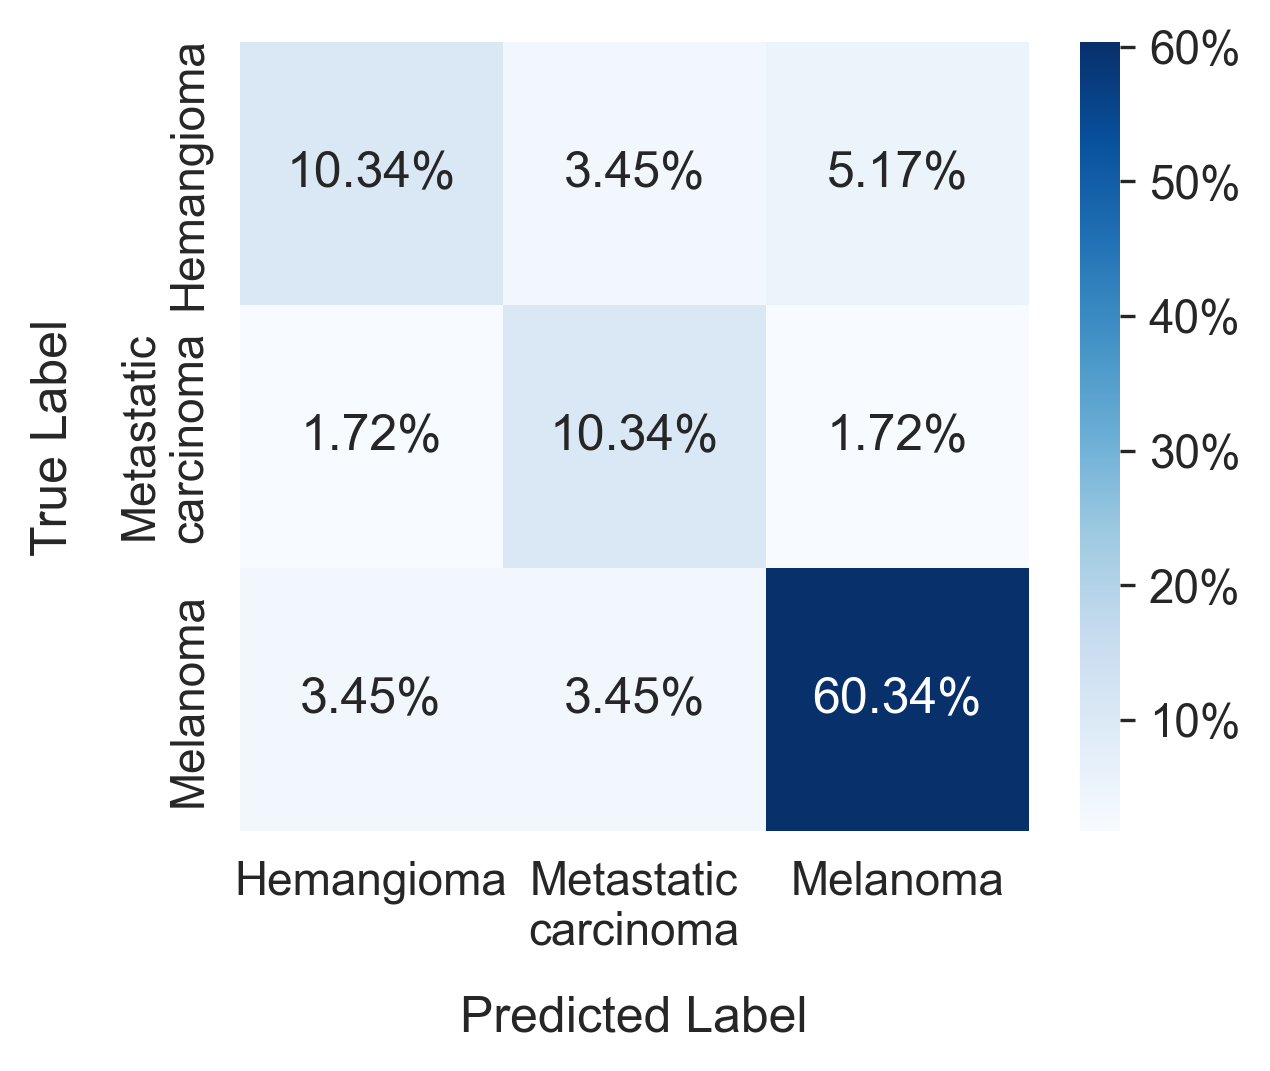

In [1]:
import os

# BlackBox Confusion Matrix
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.ticker import PercentFormatter

# Font Settings
FONT_FAMILY = 'Arial'  # Arial or Helvetica
AXIS_LABEL_SIZE = 12
TICK_LABEL_SIZE = 11
TITLE_SIZE = 13
FONT_SIZE = 12

DPI = 300
# Apply font settings
plt.rcParams['font.family'] = FONT_FAMILY


def single_plot(cm, ticklabels, name):
    # 绘制混淆矩阵图
    FIGURE_SIZE = (4.5, 3.7)
    # Using a context manager for temporarily setting the font scale for seaborn
    with sb.plotting_context(rc={"font.size": FONT_SIZE,
                                 "axes.labelsize": AXIS_LABEL_SIZE,
                                 "xtick.labelsize": TICK_LABEL_SIZE,
                                 "ytick.labelsize": TICK_LABEL_SIZE}):
        plt.figure(figsize=FIGURE_SIZE, dpi=DPI)
        ax = sb.heatmap(cm, annot=True, fmt='.2%', cmap="Blues",
                        xticklabels=ticklabels, yticklabels=ticklabels)
        # Set colorbar labels format to percentage
        cbar = ax.collections[0].colorbar
        cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
        ax.set_aspect('equal')  # Ensure the heatmap is square
        ax.set_xlabel('Predicted Label', fontsize=AXIS_LABEL_SIZE, labelpad=10)
        ax.set_ylabel('True Label', fontsize=AXIS_LABEL_SIZE, labelpad=10)
        # plt.title('Confusion Matrix', fontsize=TITLE_SIZE, pad=10)

        # Ensure the plot is displayed correctly
        plt.tight_layout()
        os.makedirs('Analysis/confusion_matrix', exist_ok=True)
        plt.savefig(f'Analysis/confusion_matrix/{name}.svg', format='svg', bbox_inches='tight')


single_plot(np.array([[10, 0, 1],
                      [1, 6, 1],
                      [0, 1, 38]]) / 58, ticklabels=['Hemangioma', 'Metastatic\ncarcinoma', 'Melanoma'], name='b0-MM-test')

single_plot(np.array([[9, 0, 2],
                       [1, 6, 1],
                       [3, 2, 34]]) / 58, ticklabels=['Hemangioma', 'Metastatic\ncarcinoma', 'Melanoma'], name='b0-FA-test')

single_plot(np.array([[10, 1, 0],
                      [0, 5, 3],
                      [2, 1, 36]]) / 58, ticklabels=['Hemangioma', 'Metastatic\ncarcinoma', 'Melanoma'], name='b0-ICGA-test')

single_plot(np.array([[6, 2, 3],
                      [1, 6, 1],
                      [2, 2, 35]]) / 58, ticklabels=['Hemangioma', 'Metastatic\ncarcinoma', 'Melanoma'], name='b0-US-test')

Accuracy: 0.8103448275862069
Precision: 0.7213675213675214
Recall: 0.730963480963481
